# Computer Vision Nanodegree

## Project: Image Captioning

---

The Microsoft **C**ommon **O**bjects in **CO**ntext (MS COCO) dataset is a large-scale dataset for scene understanding.  The dataset is commonly used to train and benchmark object detection, segmentation, and captioning algorithms.  

![Sample Dog Output](images/coco-examples.jpg)

You can read more about the dataset on the [website](http://cocodataset.org/#home) or in the [research paper](https://arxiv.org/pdf/1405.0312.pdf).

In this notebook, you will explore this dataset, in preparation for the project.

## Step 1: Initialize the COCO API

We begin by initializing the [COCO API](https://github.com/cocodataset/cocoapi) that you will use to obtain the data.

In [1]:
import os
import sys
sys.path.append('/opt/cocoapi/PythonAPI')
from pycocotools.coco import COCO

# initialize COCO API for instance annotations
dataDir = '/opt/cocoapi'
dataType = 'val2014'
instances_annFile = os.path.join(dataDir, 'annotations/instances_{}.json'.format(dataType))
coco = COCO(instances_annFile)

# initialize COCO API for caption annotations
captions_annFile = os.path.join(dataDir, 'annotations/captions_{}.json'.format(dataType))
coco_caps = COCO(captions_annFile)

# get image ids 
ids = list(coco.anns.keys())

loading annotations into memory...
Done (t=6.24s)
creating index...
index created!
loading annotations into memory...
Done (t=0.49s)
creating index...
index created!


## Step 2: Plot a Sample Image

Next, we plot a random image from the dataset, along with its five corresponding captions.  Each time you run the code cell below, a different image is selected.  

In the project, you will use this dataset to train your own model to generate captions from images!

http://images.cocodataset.org/val2014/COCO_val2014_000000009707.jpg


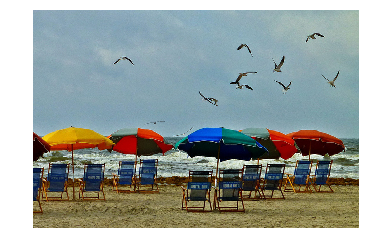

A beach scene with chairs and umbrellas and birds in the sky.
The beach chairs and colorful umbrellas are set out on the beach.
birds flying above a beach covered with beach chairs and colorful umbrellas
A bunch of seagulls flying over beach chairs and umbrellas
a number of chairs with umbrellas by an expanse of water


In [2]:
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
%matplotlib inline

# pick a random image and obtain the corresponding URL
ann_id = np.random.choice(ids)
img_id = coco.anns[ann_id]['image_id']
img = coco.loadImgs(img_id)[0]
url = img['coco_url']

# print URL and visualize corresponding image
print(url)
I = io.imread(url)
plt.axis('off')
plt.imshow(I)
plt.show()

# load and display captions
annIds = coco_caps.getAnnIds(imgIds=img['id']);
anns = coco_caps.loadAnns(annIds)
coco_caps.showAnns(anns)

#### Test

In [3]:
# pick a random image and obtain the corresponding URL
ann_id = np.random.choice(ids)
img_id = coco.anns[ann_id]['image_id']
img = coco.loadImgs(img_id)[0]
url = img['coco_url']

print(coco.anns[ann_id])

print('\n', img)

{'segmentation': [[257.03, 308.13, 256.09, 309.87, 256.09, 310.95, 256.49, 311.89, 257.17, 312.7, 257.84, 313.37, 258.24, 312.56, 258.24, 311.49, 258.65, 310.95, 259.86, 311.08, 260.8, 311.22, 260.67, 312.03, 260.67, 312.56, 262.01, 312.16, 262.55, 311.76, 262.41, 310.95, 262.55, 310.41, 263.22, 309.47, 263.62, 309.2, 264.16, 310.01, 264.43, 310.55, 265.24, 310.41, 264.97, 308.93, 264.7, 307.86, 263.62, 307.32, 262.01, 307.18, 260.67, 307.45, 259.45, 307.99, 258.38, 307.99, 257.44, 307.99]], 'area': 31.725100000000115, 'iscrowd': 0, 'image_id': 172547, 'bbox': [256.09, 307.18, 9.15, 6.19], 'category_id': 19, 'id': 274702}

 {'license': 1, 'file_name': 'COCO_val2014_000000172547.jpg', 'coco_url': 'http://images.cocodataset.org/val2014/COCO_val2014_000000172547.jpg', 'height': 480, 'width': 640, 'date_captured': '2013-11-19 00:47:26', 'flickr_url': 'http://farm6.staticflickr.com/5460/9472237717_ed0fb446cd_z.jpg', 'id': 172547}


http://images.cocodataset.org/val2014/COCO_val2014_000000172547.jpg


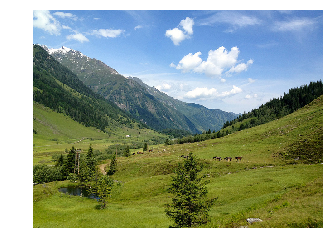

In [4]:

# print URL and visualize corresponding image
print(url)
I = io.imread(url)
plt.axis('off')
plt.imshow(I)
plt.show()


In [5]:

# load and display captions
annIds = coco_caps.getAnnIds(imgIds=img['id']);
anns = coco_caps.loadAnns(annIds)
#coco_caps.showAnns(anns)

print(anns)

[{'image_id': 172547, 'id': 16366, 'caption': 'A very green hillside in the day time.'}, {'image_id': 172547, 'id': 19519, 'caption': 'some animals are grazing in a large field'}, {'image_id': 172547, 'id': 23140, 'caption': 'A grassy hill side with some animals in the distance '}, {'image_id': 172547, 'id': 23203, 'caption': 'A lush green valley surrounded by tall mountains.'}, {'image_id': 172547, 'id': 26236, 'caption': 'A scenic view of a valley with mountains in the distance.'}]


## Step 3: What's to Come!

In this project, you will use the dataset of image-caption pairs to train a CNN-RNN model to automatically generate images from captions.  You'll learn more about how to design the architecture in the next notebook in the sequence (**1_Preliminaries.ipynb**).

![Image Captioning CNN-RNN model](images/encoder-decoder.png)